In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.decomposition
import scipy.spatial
import pandas as pd
import seaborn as sb

import tsne
import multimodal_data

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cd ..

/home/marziehhaghighi/workspace_rosetta/workspace/software


In [17]:
ls

2018_04_20_Rosetta/  results-nnC.csv  results.csv


In [64]:
# Resss

In [66]:
Resss=pd.read_csv('results-nnC.csv')
Resss=Resss['nnC'].apply(lambda x: x[1:-1])
Resss=Resss.astype(float)
Resss.mean()

0.39967667122093026

In [67]:
Resss.shape

(172,)

In [69]:
172*4

688

In [72]:
Resss.head()

,random,linear,nn,nnC
0,NaN,NaN,0.661908,0.629295
1,NaN,NaN,0.599172,0.614543
2,NaN,NaN,0.434892,0.400396
3,NaN,NaN,0.805601,0.818217
4,NaN,NaN,0.200008,0.256992


In [73]:
Resss=pd.read_csv('results-replicate-nnC.csv')
Resss=Resss[['nn','nnC']].apply(lambda x: x[1:-1])
Resss=Resss.astype(float)
Resss.mean()

nn     0.462250
nnC    0.457651
dtype: float64

In [11]:
y=pd.read_csv(dataDir+"TAOE014015_L1000/replicate_level_all_alleles.csv")
y.columns[y.columns.str.contains('etadata')]

Index([], dtype='object')

In [12]:
y.head()

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,allele
0,0.9351,-0.7092,0.7445,0.4295,-0.2673,0.4879,-1.9193,1.2111,0.3682,0.3748,...,0.7810,1.4026,-0.0342,-1.1816,0.0377,0.0000,0.0388,-0.1474,-0.7273,STK11_p.G56W
1,0.1938,-0.8948,0.5174,-0.6126,-0.9075,0.7549,-0.6745,-1.3880,-1.1167,-1.4509,...,-0.4040,-0.3374,-0.3401,0.1351,-0.1123,-0.2336,0.9676,7.7144,0.0718,STK11_p.G56W
2,-0.1961,-0.1821,14.3808,3.0511,-0.1334,0.6940,-0.0300,-0.4245,-1.5383,-0.4151,...,-1.0599,0.9036,3.7128,0.8236,1.0865,0.0838,2.1439,0.9606,0.1927,STK11_p.G56W
3,-0.0667,-0.6642,-0.9087,-0.3771,-1.6177,0.2308,-0.5010,-0.7268,-1.0930,0.5213,...,-0.4752,0.1437,0.2395,-0.5959,-0.1953,0.6105,0.4223,-0.3854,0.6411,STK11_p.G56W
4,0.8557,-0.1338,1.6105,0.6327,-0.6589,0.5401,-0.6037,0.4563,-0.0654,-0.4659,...,0.6814,0.7776,1.0793,-0.9001,-1.3934,-0.6889,-0.0760,0.3536,0.2316,STK11_p.G56W


In [40]:
x=pd.read_csv(dataDir+"TAOE014015_CellPainting_Resnet/morphology.csv")
x.columns[x.columns.str.contains('etadata')]

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Metadata_Plate', 'Metadata_Well', 'Metadata_Assay_Plate_Barcode',
       'Metadata_Plate_Map_Name', 'Metadata_well_position',
       'Metadata_NCBIGeneID', 'Metadata_pert_type', 'Metadata_PublicID',
       'Metadata_Transcript', 'Metadata_VirusPlateName',
       'Metadata_x_mutation_status', 'Metadata_broad_sample',
       'Metadata_pert_name', 'Metadata_pert_id', 'Metadata_pert_mfc_id',
       'Metadata_pert_well', 'Metadata_pert_id_vendor', 'Metadata_cell_id',
       'Metadata_broad_sample_type'],
      dtype='object')

In [38]:
x.columns[x.columns.str.contains('url')]

Index([], dtype='object')

In [47]:
x.loc[:,x.columns.str.contains('etadata')].head()

,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_NCBIGeneID,Metadata_pert_type,Metadata_PublicID,Metadata_Transcript,Metadata_VirusPlateName,Metadata_x_mutation_status,Metadata_broad_sample,Metadata_pert_name,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,Metadata_pert_id_vendor,Metadata_cell_id,Metadata_broad_sample_type
0,52649,g05,52649,DOC45.46.47.48,g05,23457.0,trt,BRDN0000553807,NM_001243014.1,DOC45.46.47.48,ABCB9_p.R281L,BRDN0000553807,BRDN0000553807,NaN,BRDN0000553807,g05,NaN,A549,trt
1,52653,g05,52653,DOC45.46.47.48,g05,23457.0,trt,BRDN0000553807,NM_001243014.1,DOC45.46.47.48,ABCB9_p.R281L,BRDN0000553807,BRDN0000553807,NaN,BRDN0000553807,g05,NaN,A549,trt
2,52657,g05,52657,DOC45.46.47.48,g05,23457.0,trt,BRDN0000553807,NM_001243014.1,DOC45.46.47.48,ABCB9_p.R281L,BRDN0000553807,BRDN0000553807,NaN,BRDN0000553807,g05,NaN,A549,trt
3,52663,g05,52663,DOC45.46.47.48,g05,23457.0,trt,BRDN0000553807,NM_001243014.1,DOC45.46.47.48,ABCB9_p.R281L,BRDN0000553807,BRDN0000553807,NaN,BRDN0000553807,g05,NaN,A549,trt
4,52664,g05,52664,DOC45.46.47.48,g05,23457.0,trt,BRDN0000553807,NM_001243014.1,DOC45.46.47.48,ABCB9_p.R281L,BRDN0000553807,BRDN0000553807,NaN,BRDN0000553807,g05,NaN,A549,trt


# Load data

In [7]:
dataDir="../collated/"
l1k = multimodal_data.load_l1000(dataDir+"TAOE014015_L1000/replicate_level_all_alleles.csv")
cp = multimodal_data.load_cell_painting(
    dataDir+"TAOE014015_CellPainting_Resnet/morphology.csv", 
    dataDir+"TAOE014015_CellPainting_Resnet/resnet18-validation-well_profiles.csv", 
    aggregate_replicates=False
)
print(l1k.shape,cp.shape)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Treatments: 306
(4232, 979) (2560, 256)


In [32]:
l1k.shape

(4232, 979)

In [52]:
l1k;

In [33]:
cp.shape

(2560, 256)

In [5]:
l1k, cp = multimodal_data.align_profiles(l1k, cp, sample=0)
GE = np.asarray(l1k)[:,1:]
MP = np.asarray(cp)[:,1:]
print(l1k.shape,cp.shape)

From: (4232, 979) (2560, 256)
To: (1400, 979) (1292, 256)
(1400, 979) (1292, 256)


In [15]:
l1k.groupby('Allele').size()

Allele
ABCB9_WT.c        8
ABCB9_WT.o        8
ABCB9_p.R281L     8
ABCB9_p.V140M     8
ACAA1_WT.o        8
ACAT2_WT.o        8
ACD_WT.o          8
AKR1B1_WT.c       8
AKR1B1_WT.o       8
AKR1B1_p.F252L    8
AKR1B1_p.P14R     8
AKR1B1_p.Q27K     8
AKT1_p.D323Y      8
ARAF_WT.c         8
ARAF_p.D429A      8
ARAF_p.L96Q       8
ARAF_p.S214C      8
ARAF_p.S214F      8
ARAF_p.V145L      8
ATF2_WT.c         8
ATF2_WT.o         8
ATF2_p.K106R      8
ATF2_p.P70S       8
ATF2_p.T339A      8
AURKB_WT.o        8
BFP               8
BRAF_WT.c         8
BRAF_p.A762E      8
BRAF_p.D594H      8
BRAF_p.G466A      8
                 ..
TP53_p.V274F      8
TP53_p.Y205C      8
TP53_p.Y205H      8
TP53_p.Y220C      8
TPK1_WT.c         8
TPK1_p.E81Q       8
TPK1_p.G48C       8
TPK1_p.K111M      8
TPK1_p.L185I      8
TPK1_p.P152T      8
TPK1_p.T205S      8
TPK1_p.T213S      8
TRAP1_WT.o        8
TSTA3_WT.o        8
U2AF1_WT.c        8
U2AF1_WT.o        8
U2AF1_p.S34F      8
UnTrt             8
ZBTB24_WT.c  

In [14]:
cp.groupby('Allele').size()

Allele
ABCB9_WT            4
ABCB9_WT_V5         4
ABCB9_p.R281L       4
ACAA1_WT_V5         4
ACAT2_WT_V5        12
ACD_WT_V5           4
AKR1B1_WT           4
AKR1B1_WT_V5        4
AKR1B1_p.F252L      4
AKT1_p.D323Y        4
ARAF_WT             4
ARAF_p.D429A        4
ARAF_p.S214C        4
ARAF_p.S214F        4
ARAF_p.V145L        4
ATF2_WT             4
ATF2_WT_V5          4
ATF2_p.T339A        4
AURKB_WT_V5         4
BFP               124
BRAF_WT             4
BRAF_p.A762E        4
BRAF_p.D594H        4
BRAF_p.G466A        4
BRAF_p.G466E        4
BRAF_p.G466V        4
BRAF_p.G469S        4
BRAF_p.G469V        4
BRAF_p.H574N        4
BRAF_p.H574Q        4
                 ... 
STK11_p.G56V        4
TERT_p.L593F        4
TP53_WT             4
TP53_p.P278A       60
TP53_p.P278H        4
TP53_p.P278T        4
TPK1_WT             4
TPK1_p.E81Q         4
TPK1_p.G48C         4
TPK1_p.K111M        4
TPK1_p.L185I        4
TPK1_p.P152T        4
TPK1_p.T205S        4
TPK1_p.T213S        4
TRA

In [8]:
print(l1k["Allele"].unique().shape)
print(cp["Allele"].unique().shape)

(529,)
(306,)


# Separate training and validation

In [5]:
common_alleles = set(cp["Allele"].unique()).intersection( l1k["Allele"].unique() )
genes = list(common_alleles)
genes = [x for x in genes if x not in ["EGFP", "BFP", "HCRED"]]
np.random.shuffle(genes)

train = genes[0:9*int(len(genes)/10)]
test = genes[9*int(len(genes)/10):]

GE_train = l1k[l1k["Allele"].isin(train)]
MP_train = cp[cp["Allele"].isin(train)]

GE_test = l1k[l1k["Allele"].isin(test)]
MP_test = cp[cp["Allele"].isin(test)]

# Normalize inputs and outputs

In [6]:
def z_score(A, model, features):
    alleles = list(A["Allele"])
    A = pd.DataFrame(data=model.transform(A[features]), columns=features)
    A["Allele"] = alleles
    return A[["Allele"] + features]

ge_features = [str(i) for i in range(GE.shape[1])]
sc_l1k = sklearn.preprocessing.StandardScaler()
sc_l1k.fit(GE_train[ge_features])
GE_train = z_score(GE_train, sc_l1k, ge_features)
GE_test = z_score(GE_test, sc_l1k, ge_features)

mp_features = [str(i) for i in range(MP.shape[1])]
sc_cp = sklearn.preprocessing.StandardScaler()
sc_cp.fit(MP_train[mp_features])
MP_train = z_score(MP_train, sc_cp, mp_features)
MP_test = z_score(MP_test, sc_cp, mp_features)

# Create Neural Net

In [7]:
def mp2ge_net(in_size, out_size):
    inLayer = tf.keras.layers.Input([in_size])
    net = tf.keras.layers.Dense(in_size, activation="relu")(inLayer)
    net = tf.keras.layers.BatchNormalization()(net)
    net = tf.keras.layers.Dense(in_size//2, activation="relu")(net)
    net = tf.keras.layers.BatchNormalization()(net)
    net = tf.keras.layers.Dropout(0.5)(net)
    net = tf.keras.layers.Dense(out_size//4, activation="relu")(net)
    net = tf.keras.layers.BatchNormalization()(net)
    net = tf.keras.layers.Dropout(0.5)(net)
    net = tf.keras.layers.Dense(out_size, activation=None)(net)
    return tf.keras.Model(inLayer, net)

In [8]:
model = mp2ge_net(MP.shape[1], GE.shape[1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 255)               0         
_________________________________________________________________
dense (Dense)                (None, 255)               65280     
_________________________________________________________________
batch_normalization (BatchNo (None, 255)               1020      
_________________________________________________________________
dense_1 (Dense)              (None, 127)               32512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 127)               508       
_________________________________________________________________
dropout (Dropout)            (None, 127)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 244)               31232     
__________

In [13]:
def ge2mp_net(in_size, out_size):
    inLayer = tf.keras.layers.Input([in_size])
    net = tf.keras.layers.Dense(in_size, activation="relu")(inLayer)
    net = tf.keras.layers.BatchNormalization()(net)
    net = tf.keras.layers.Dense(in_size*2, activation="relu")(net)
    net = tf.keras.layers.BatchNormalization()(net)
    net = tf.keras.layers.Dropout(0.5)(net)
    net = tf.keras.layers.Dense(out_size*4, activation="relu")(net)
    net = tf.keras.layers.BatchNormalization()(net)
    net = tf.keras.layers.Dropout(0.5)(net)
    net = tf.keras.layers.Dense(out_size, activation=None)(net)
    return tf.keras.Model(inLayer, net)

model = ge2mp_net(GE.shape[1], MP.shape[1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 978)               0         
_________________________________________________________________
dense (Dense)                (None, 978)               957462    
_________________________________________________________________
batch_normalization (BatchNo (None, 978)               3912      
_________________________________________________________________
dense_1 (Dense)              (None, 1956)              1914924   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1956)              7824      
_________________________________________________________________
dropout (Dropout)            (None, 1956)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1020)              1996140   
__________

# Prepare data generator

In [9]:
class MultimodalDataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, modA, modB, batch_size=32):
        'Initialization'
        self.batch_size = batch_size
        self.modA = modA
        self.modB = modB
        self.classes = set( modA["Allele"].unique()).intersection( modB["Allele"].unique() )
        self.classes = list(self.classes)
        self.create_samples()
        
    def create_samples(self):
        dataA = []
        dataB = []
        classes = []
        # Generate all combinations of A and B with the same label
        for cl in self.classes:
            for idx, rowA in self.modA[self.modA["Allele"] == cl].iterrows():
                for jdx, rowB in self.modB[self.modB["Allele"] == cl].iterrows():
                    dataA.append(np.reshape(np.asarray(rowA)[1:], (1,self.modA.shape[1]-1)))
                    dataB.append(np.reshape(np.asarray(rowB)[1:], (1,self.modB.shape[1]-1)))
                    classes.append(cl)
        self.X = np.concatenate(dataA)
        self.Y = np.concatenate(dataB)
        self.Z = classes
        print("Total pairs:", len(dataA), self.X.shape, self.Y.shape)

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.modA) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Initialization
        index = np.arange(0,self.X.shape[0])
        np.random.shuffle(index)
        X = self.X[index[0:self.batch_size], :]
        Y = self.Y[index[0:self.batch_size], :]
        return X, Y

# Train model

In [10]:
#build session running on GPU 1
configuration = tf.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "3"
session = tf.Session(config = configuration)

tf.keras.backend.set_session(session)

In [11]:
model.compile(optimizer='adam', loss='mean_absolute_error')
dgen_train = MultimodalDataGenerator(MP_train, GE_train)
dgen_test = MultimodalDataGenerator(MP_test, GE_test)
model.fit_generator(dgen_train, epochs=100, validation_data=dgen_test)

Total pairs: 6688 (6688, 255) (6688, 978)
Total pairs: 608 (608, 255) (608, 978)
Epoch 1/100
26/26 [==============================] - 2s 92ms/step - loss: 0.9364 - val_loss: 0.6455
Epoch 2/100
26/26 [==============================] - 0s 17ms/step - loss: 0.8501 - val_loss: 0.6157
Epoch 3/100
26/26 [==============================] - 0s 17ms/step - loss: 0.7485 - val_loss: 0.6203
Epoch 4/100
26/26 [==============================] - 0s 19ms/step - loss: 0.7212 - val_loss: 0.5870
Epoch 5/100
26/26 [==============================] - 1s 20ms/step - loss: 0.6858 - val_loss: 0.6033
Epoch 6/100
26/26 [==============================] - 1s 20ms/step - loss: 0.6846 - val_loss: 0.5582
Epoch 7/100
26/26 [==============================] - 1s 19ms/step - loss: 0.6794 - val_loss: 0.5677
Epoch 8/100
26/26 [==============================] - 0s 19ms/step - loss: 0.6591 - val_loss: 0.5926
Epoch 9/100
26/26 [==============================] - 0s 18ms/step - loss: 0.6358 - val_loss: 0.5678
Epoch 10/100
26/26 

# Make predictions

In [12]:
predicted_ge = model.predict(np.asarray(MP_test)[:,1:])

predicted_ge = pd.DataFrame(data=predicted_ge, columns=ge_features)
predicted_ge["Allele"] = MP_test["Allele"]
predicted_ge = predicted_ge[["Allele"] + ge_features]

predicted_ge["Real"] = False
GE_test["Real"] = True

compare_ge = pd.concat([GE_test, predicted_ge]).reset_index(drop=True)

In [13]:
# Compute tSNE
X = np.asarray(compare_ge)[:,1:-1]
X = np.asarray(X, dtype=np.float)
Y = tsne.tsne(X)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  228 ...
Mean value of sigma:  6.695245034630108
Iteration  10 : error is  12.611328108383894
Iteration  20 : error is  11.874675922790894
Iteration  30 : error is  13.356405506780789
Iteration  40 : error is  13.570163468427186
Iteration  50 : error is  13.387189338123665
Iteration  60 : error is  12.55898950121224
Iteration  70 : error is  12.850959794945654
Iteration  80 : error is  13.658284750232292
Iteration  90 : error is  13.067298981360388
Iteration  100 : error is  12.968643742593619
Iteration  110 : error is  1.6477230690673739
Iteration  120 : error is  1.1720244027878186
Iteration  130 : error is  1.0245360413711924
Iteration  140 : error is  0.8856744353306784
Iteration  150 : error is  0.8040942347509483
Iteration  160 : error is  0.6986477443784932
Iteration  170 : error is  0.6135820475298469
Iteration  180 : error is  0.5706412003184266
Iteration  190 : error is  0.

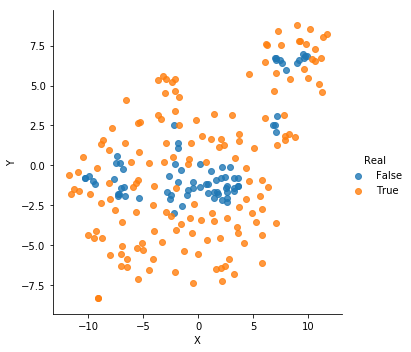

In [14]:
compare_ge["X"] = Y[:,0]
compare_ge["Y"] = Y[:,1]
sb.lmplot(data=compare_ge, x="X", y="Y", hue="Real", fit_reg=False)

In [15]:
M1 = Y[0:GE_test.shape[0],0:2]
M2 = Y[GE_test.shape[0]:,0:2]
D = scipy.spatial.distance_matrix(M1, M2)
NN = np.argsort(D, axis=1) # Nearest morphology point to each gene expression point

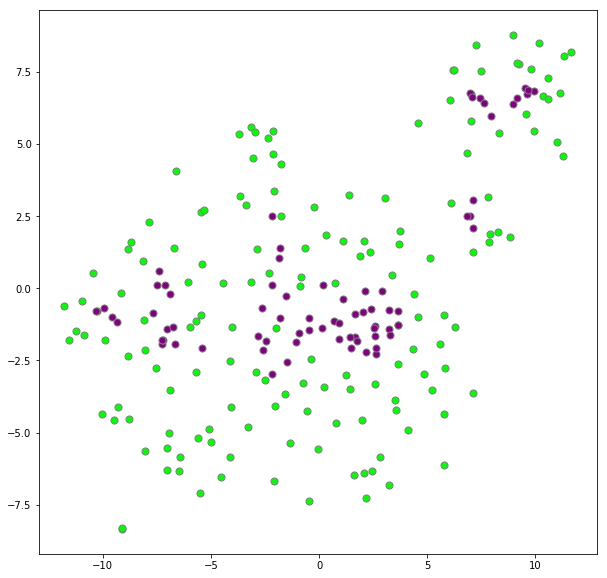

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(M1[:,0], M1[:,1], c="lime", s=50, edgecolor='gray', linewidths=1)
plt.scatter(M2[:,0], M2[:,1], c="purple", s=50, edgecolor='gray', linewidths=1)

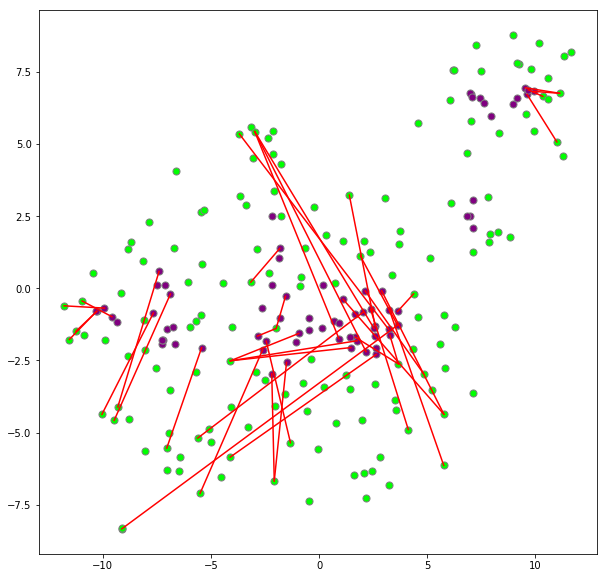

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(M1[:,0], M1[:,1], c="lime", s=50, edgecolor='gray', linewidths=1)
plt.scatter(M2[:,0], M2[:,1], c="purple", s=50, edgecolor='gray', linewidths=1)

for i in range(M2.shape[0]):
    for j in range(M1.shape[0]):
        if predicted_ge.iloc[i].Allele == GE_test.iloc[NN[j,i]].Allele:
            plt.plot([M1[NN[j,i],0],M2[i,0]],[M1[NN[j,i],1],M2[i,1]], 'k-', color="red")
            break

In [18]:
NN.shape, M1.shape, M2.shape

((152, 76), (152, 2), (76, 2))

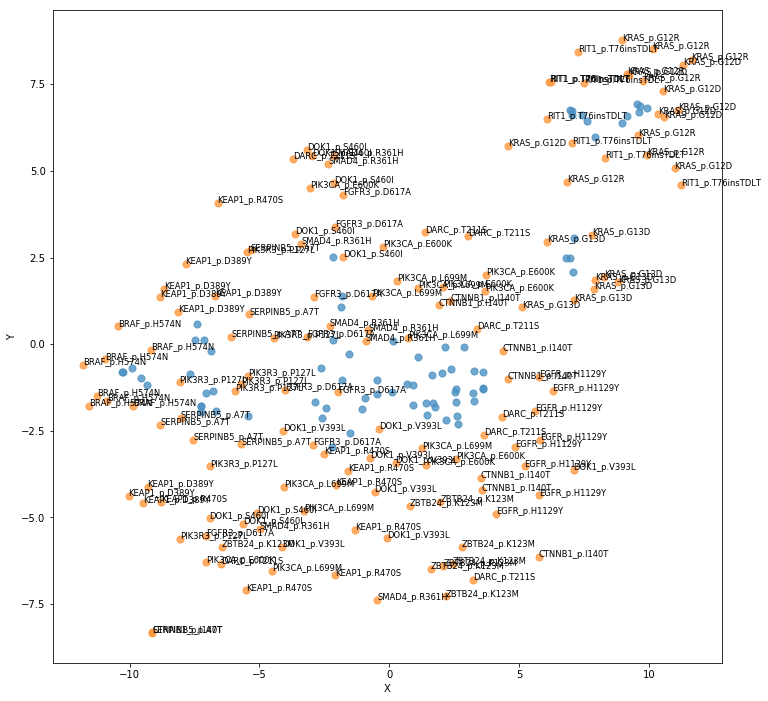

In [19]:
plt.figure(figsize=(12,12))
p1 = sb.regplot(data=compare_ge[compare_ge["Real"]], x="X", y="Y", fit_reg=False, color="#FF983E", scatter_kws={'s':50})
for point in range(compare_ge.shape[0]):
    if compare_ge.Real[point]:
        p1.text(compare_ge.X[point], compare_ge.Y[point], compare_ge.Allele[point], horizontalalignment='left', size='small', color='black')

p2 = sb.regplot(data=compare_ge[~compare_ge["Real"]], x="X", y="Y", fit_reg=False, color="#4B91C2", scatter_kws={'s':50})
# for point in range(compare_ge.shape[0]):
#     if not compare_ge.Real[point]:
#         p2.text(compare_ge.X[point], compare_ge.Y[point], compare_ge.Allele[point], horizontalalignment='left', size='small', color='black')

In [20]:
compare_ge.Real[point]

False